In [58]:
import json
from collections import Counter
import re
from matplotlib import pyplot as plt

In [2]:
data = json.load(open('../../data/processed/depositonce.json'))

In [55]:
all_dates = [obj['date'] for obj in data]
dates = [obj['date'] for obj in data if obj["date"] is not None]
date_cnt = Counter(all_dates)
y = [re.match('^\d{4}$', d) is not None for d in dates]
ym = [re.match('^\d{4}-\d{2}$', d) is not None for d in dates]
ymd = [re.match('^\d{4}-\d{2}-\d{2}$', d) is not None for d in dates]

In [57]:
print(f'In total there are {len(all_dates)} publications.\n')
print('Format\t\tCount')
remaining = len(all_dates) - sum(ymd) - sum(ym) - sum(y) - date_cnt[None]
for format, count in [
            ('null\t', date_cnt[None]),
            ('YYYY\t', sum(y)), 
            ('YYYY-MM\t', sum(ym)),
            ('YYYY-MM-DD', sum(ymd)),
            ('Remaining', remaining)
        ]:
    print(f'{format}\t{count}')

In total there are 200 publications.

Format		Count
null		147
YYYY		36
YYYY-MM		3
YYYY-MM-DD	14
Remaining	0


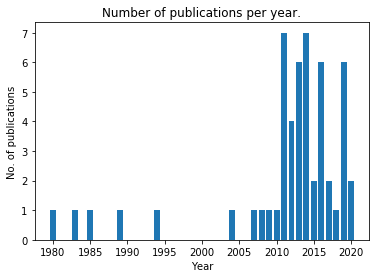

In [74]:
years_cnt = Counter([int(d[:4]) for d in dates])
plt.bar(years_cnt.keys(), years_cnt.values())
plt.title('Number of publications per year.')
plt.xlabel('Year')
plt.ylabel('No. of publications')
plt.show()

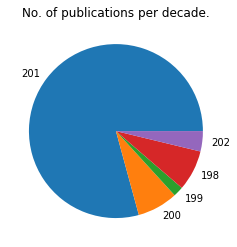

In [73]:
decades_cnt = Counter([int(d[:3]) for d in dates])
plt.pie(decades_cnt.values(), labels=decades_cnt.keys())
plt.title('No. of publications per decade.')
plt.show()